# Calculating variability amplitudes.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import trange

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

import kepler_datjka as kd

Load the catalog of stars in the kinematics-and-rotation project.

In [35]:
df = pd.read_csv("../data/gaia_mc_cuts.csv")

Rvar = np.zeros(len(df))
for i in trange(len(df.kepid.values)):
    lcdir = "/Users/rangus/.kplr/data/lightcurves/{}".format(str(df.kepid.values[i]).zfill(9))
    x, y, yerr = kd.load_and_join(lcdir)
    Rvar[i] = np.percentile(y, 95) - np.percentile(y, 5) * 1e6


  7%|▋         | 303/4557 [01:43<26:10,  2.71it/s]


 13%|█▎        | 605/4557 [03:23<23:55,  2.75it/s]


 20%|█▉        | 907/4557 [05:06<21:39,  2.81it/s]


 26%|██▋       | 1205/4557 [06:44<18:49,  2.97it/s]


 30%|██▉       | 1357/4557 [07:38<17:46,  3.00it/s]

IndexError: list index out of range

In [36]:
df["Rvar"] = Rvar
df.to_csv("../data/gaia_mc_rvar.csv")

Text(0, 0.5, 'Rvar')

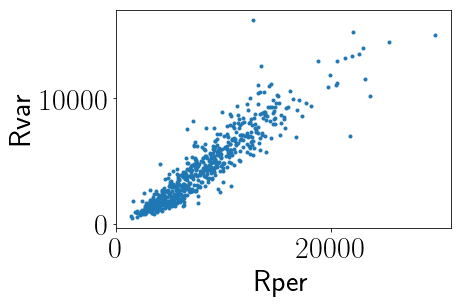

In [33]:
plt.plot(df.Rper[:1357], df.Rvar[:1357], ".")
plt.xlabel("Rper")
plt.ylabel("Rvar")

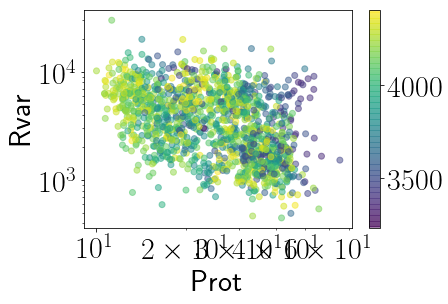

In [47]:
plt.scatter(df.Prot[:1357], df.Rvar[:1357], c=df.Teff[:1357], alpha=.5)
plt.colorbar()
plt.xlabel("Prot")
plt.ylabel("Rvar")
plt.yscale("log")
plt.xscale("log")

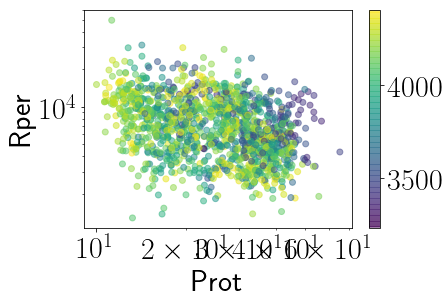

In [49]:
plt.scatter(df.Prot[:1357], df.Rper[:1357], c=df.Teff[:1357], alpha=.5)
plt.colorbar()
plt.xlabel("Prot")
plt.ylabel("Rper")
plt.yscale("log")
plt.xscale("log")

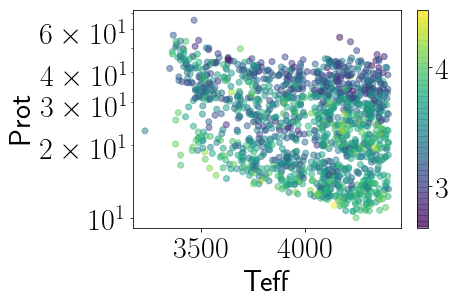

In [52]:
plt.scatter(df.Teff[:1357], df.Prot[:1357], c=np.log10(df.Rvar[:1357]), alpha=.5)
plt.colorbar()
plt.xlabel("Teff")
plt.ylabel("Prot")
plt.yscale("log")

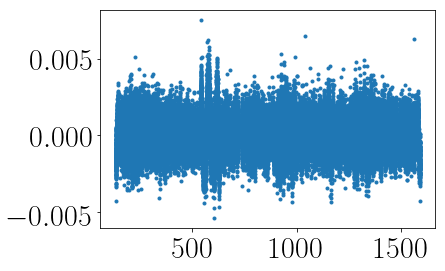

In [5]:
plt.plot(x, y, ".")

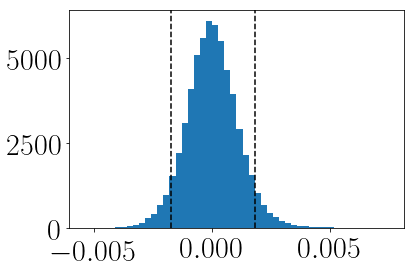

In [15]:
plt.hist(y, 50);
plt.axvline(np.percentile(y, 5), color="k", ls="--")
plt.axvline(np.percentile(y, 95), color="k", ls="--")
Rvar = 

In [16]:
print(Rvar, df.Rper.values[0])

1728.7451533079147 6320.15
